In [30]:
from cloude.cloude_cov import read_mueller_matrix_from_file, reshape_2D_into_dataframe, cloude_decomposition
from cloude.cloude_reference import cloudeDecomposition
from scipy.signal import savgol_filter

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
MM = read_mueller_matrix_from_file('Al2O3_smooth_back_MM.txt')
reshaped_mm = MM.values.reshape(-1, 4, 4)
MM_cloude = cloude_decomposition(reshaped_mm, cut_off=3)
Mdf_cloude = reshape_2D_into_dataframe(MM, MM_cloude)

M_cloude_ref = np.zeros(reshaped_mm.shape)
for i in range(reshaped_mm.shape[0]):
    M1, M2, M3, M4, _ = cloudeDecomposition(reshaped_mm[i])
    M_cloude_ref[i] = M1 + M2 + M3 + M4
    
Mdf_cloude_ref = reshape_2D_into_dataframe(MM, M_cloude_ref)

C:\Users\Florian\Documents\Temporary Checkout\Henrik Ellipsometry\Sapphire Samples\MuellerMatrix\cloude\cloude_cov.py:71: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\Users\Florian\Documents\Temporary Checkout\Henrik Ellipsometry\Sapphire Samples\MuellerMatrix\cloude\cloude_cov.py:72: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\Users\Florian\Documents\Temporary Checkout\Henrik Ellipsometry\Sapphire Samples\MuellerMatrix\cloude\cloude_cov.py:73: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\Users\Florian\Documents\Temporary Checkout\Henrik Ellipsometry\Sapphire Samples\MuellerMatrix\cloude\cloude_cov.py:74: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\Users\Florian\Documents\Temporary Checkout\Henrik Ellipsometry\Sapphire Samples\MuellerMatrix\cloude\cloude_cov.py:75: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\Us

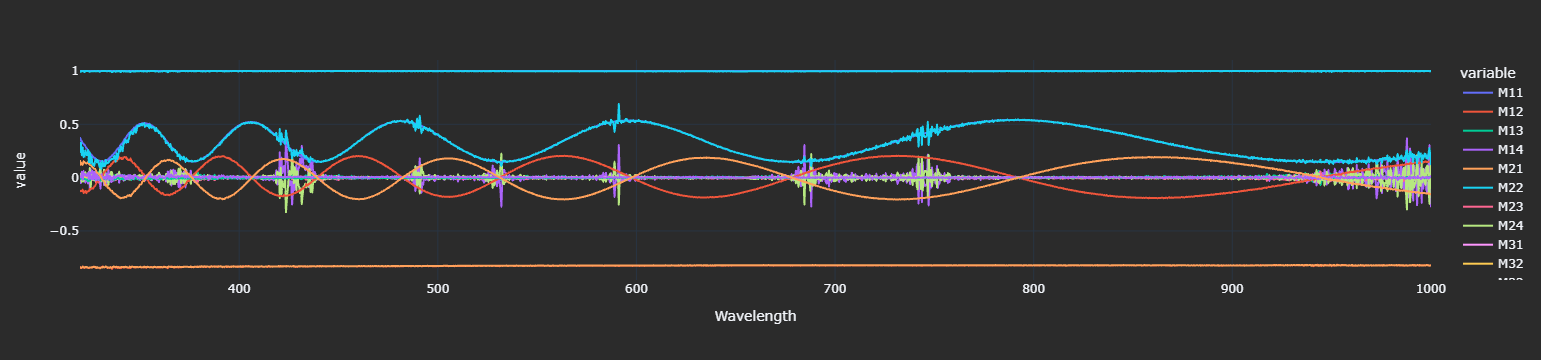

In [32]:
MM.plot()

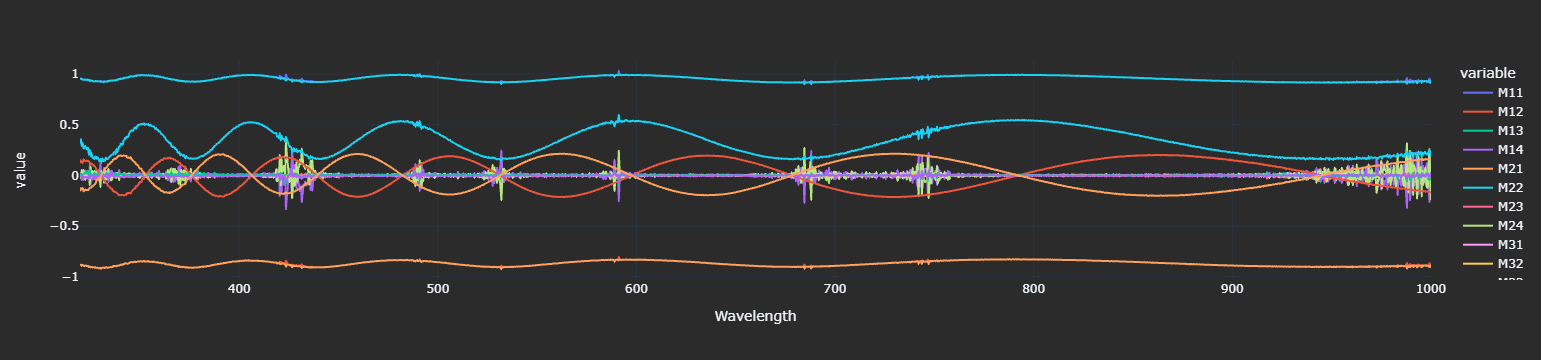

In [29]:
Mdf_cloude.plot()

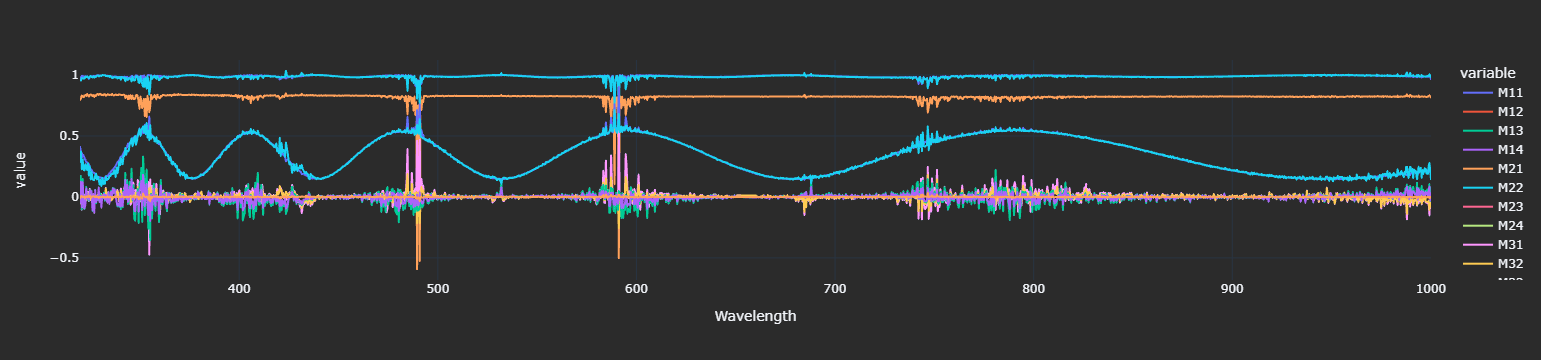

In [9]:
Mdf_cloude_ref.plot()

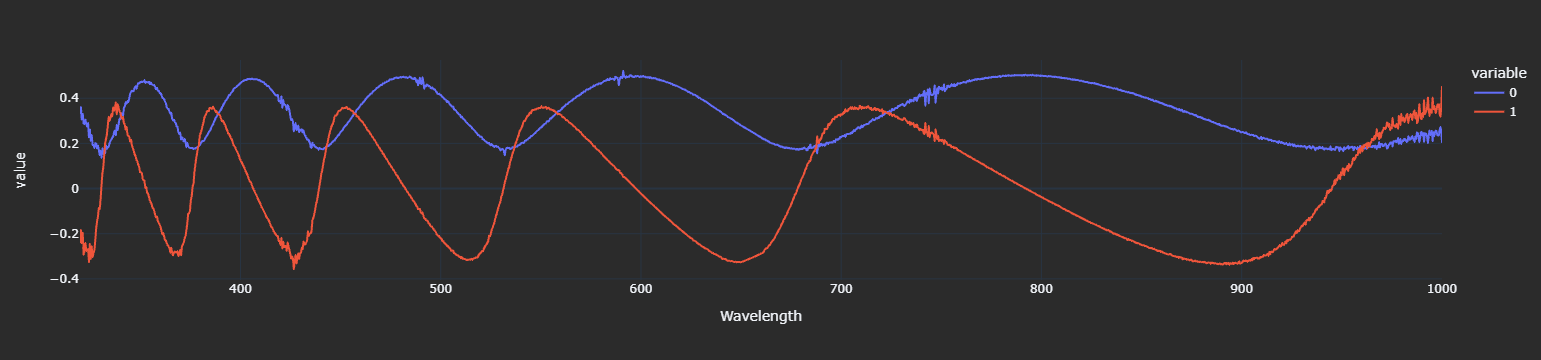

In [20]:
N = -Mdf_cloude.loc[:,['M12', 'M21']].mean(axis=1)
C = Mdf_cloude.loc[:,'M33']
S = Mdf_cloude.loc[:,'M34']

Ψ = (C + 1j * S / (1 + N)).apply(lambda x: np.arctan(np.abs(x)))
Δ = (C + 1j * S / (1 + N)).apply(lambda x: np.angle(x))

pd.concat([Ψ, Δ], axis=1).plot()

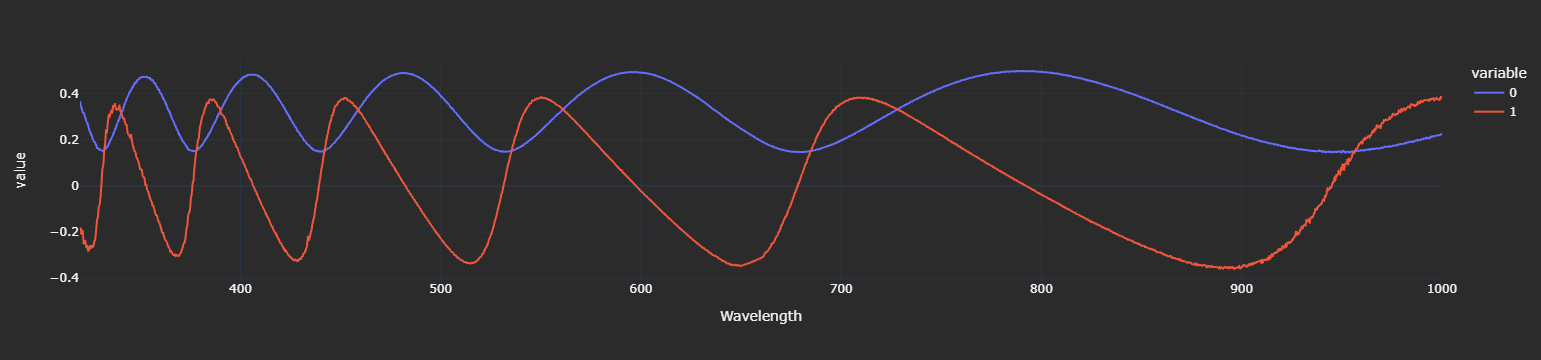

In [21]:
N = -MM.loc[:,['M12', 'M21']].mean(axis=1)
C = MM.loc[:,'M33']
S = (MM.loc[:,'M34'] - MM.loc[:,'M43'])/2

Ψ = (C + 1j * S / (1 + N)).apply(lambda x: np.arctan(np.abs(x)))
Δ = (C + 1j * S / (1 + N)).apply(lambda x: np.angle(x))

pd.concat([Ψ, Δ], axis=1).plot()

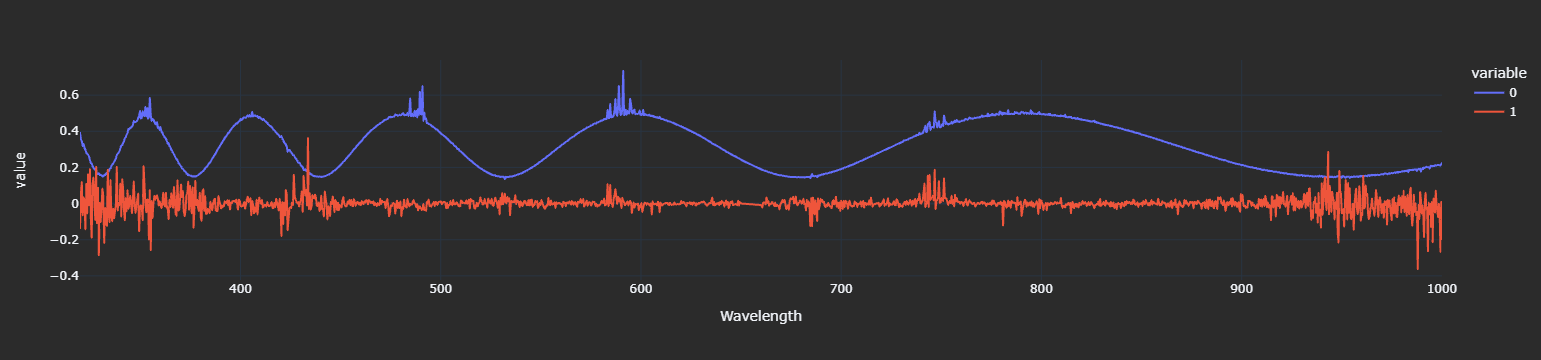

In [37]:
N = -Mdf_cloude_ref.loc[:,['M12', 'M21']].mean(axis=1)
C = Mdf_cloude_ref.loc[:,'M33']
S = Mdf_cloude_ref.loc[:,'M34']

Ψ = (C + 1j * S / (1 + N)).apply(lambda x: np.arctan(np.abs(x)))
Δ = (C + 1j * S / (1 + N)).apply(lambda x: np.angle(x))

pd.concat([Ψ, Δ], axis=1).plot()

In [70]:
testM = np.array([[[1, 0.0707, 0.0348, -0.0060],
                 [0.0480, 0.4099, 0.0077, 0.0650],
                 [0.0162, -0.0184, 0.2243, -0.3580],
                 [0.0021, -0.465, 0.3571, 0.1783]]])

tM = testM[0]

In [76]:
np.transpose(testM, (0, 2, 1))

array([[[ 1.    ,  0.048 ,  0.0162,  0.0021],
        [ 0.0707,  0.4099, -0.0184, -0.465 ],
        [ 0.0348,  0.0077,  0.2243,  0.3571],
        [-0.006 ,  0.065 , -0.358 ,  0.1783]]])

In [67]:
M1, M2, M3, M4, _ = cloudeDecomposition(testM[0])
M1 + M2 + M3 + M4

array([[ 0.76450621, -0.03361359, -0.04891811, -0.05475188],
       [-0.03361359,  0.35562774, -0.08483906,  0.1313574 ],
       [-0.04891811, -0.08483906,  0.23641608,  0.02157108],
       [-0.05475188,  0.1313574 ,  0.02157108,  0.32094805]])

In [79]:
M = cloude_decomposition(testM, cut_off=0)[0]
M

#np.sqrt(sum(sum(M**2)) - M[0, 0]**2) / np.sqrt(3) / M[0, 0]

array([[ 0.47029345,  0.05935001,  0.0255    , -0.00195   ],
       [ 0.05935001,  0.45289167, -0.00424563, -0.00085892],
       [ 0.0255    , -0.00424563,  0.44389889, -0.00456206],
       [-0.00195   , -0.00085892, -0.00456206,  0.44541593]])

In [147]:
from sympy import symbols, zeros, Trace

In [149]:
σ = {}
σ[0] = [[1, 0], 
        [0, 1]]
σ[1] = [[1, 0], 
        [0, -1]]
σ[2] = [[0, 1], 
        [1, 0]]
σ[3] = [[0, -1j], 
        [1j, 0]]

In [177]:
C = zeros(4,4)
for i in range(4):
    for j in range(4):
        C += symbols(f'm{i}{j}') * np.kron(σ[i], σ[j])
C

Matrix([
[                m00 + m01 + m10 + m11,     m02 - 1.0*I*m03 + m12 - 1.0*I*m13,     m20 + m21 - 1.0*I*m30 - 1.0*I*m31, m22 - 1.0*I*m23 - 1.0*I*m32 - 1.0*m33],
[    m02 + 1.0*I*m03 + m12 + 1.0*I*m13,                 m00 - m01 + m10 - m11, m22 + 1.0*I*m23 - 1.0*I*m32 + 1.0*m33,     m20 - m21 - 1.0*I*m30 + 1.0*I*m31],
[    m20 + m21 + 1.0*I*m30 + 1.0*I*m31, m22 - 1.0*I*m23 + 1.0*I*m32 + 1.0*m33,                 m00 + m01 - m10 - m11,     m02 - 1.0*I*m03 - m12 + 1.0*I*m13],
[m22 + 1.0*I*m23 + 1.0*I*m32 - 1.0*m33,     m20 - m21 + 1.0*I*m30 - 1.0*I*m31,     m02 + 1.0*I*m03 - m12 - 1.0*I*m13,                 m00 - m01 - m10 + m11]])

In [182]:
H = zeros(4, 4)

for i in range(H.shape[0]):
    for j in range(H.shape[1]):
        H[i, j] = symbols(f'H{i}{j}')

M = zeros(4)
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        M[i, j] = Trace(np.kron(σ[i], σ[j]) @ H).simplify()
M

Matrix([
[                        H00 + H11 + H22 + H33,                         H00 - H11 + H22 - H33,                         H01 + H10 + H23 + H32, 1.0*I*H01 - 1.0*I*H10 + 1.0*I*H23 - 1.0*I*H32],
[                        H00 + H11 - H22 - H33,                         H00 - H11 - H22 + H33,                         H01 + H10 - H23 - H32, 1.0*I*H01 - 1.0*I*H10 - 1.0*I*H23 + 1.0*I*H32],
[                        H02 + H13 + H20 + H31,                         H02 - H13 + H20 - H31,                         H03 + H12 + H21 + H30, 1.0*I*H03 - 1.0*I*H12 + 1.0*I*H21 - 1.0*I*H30],
[1.0*I*H02 + 1.0*I*H13 - 1.0*I*H20 - 1.0*I*H31, 1.0*I*H02 - 1.0*I*H13 - 1.0*I*H20 + 1.0*I*H31, 1.0*I*H03 + 1.0*I*H12 - 1.0*I*H21 - 1.0*I*H30,        -1.0*H03 + 1.0*H12 + 1.0*H21 - 1.0*H30]])